##### Note: This has been run on `diva` machine

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
# sys.path.append("/Users/piyush/projects/ViDA-SSL/")
sys.path.append("/home/pbagad/projects/ViDA-SSL/")

In [3]:
from os.path import join
from glob import glob
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision.io import read_video_timestamps

from utils.io import load_json, load_txt

In [4]:
DATA_DIR = "/ssd/fmthoker/ntu/"
# DATA_DIR = "../../data/NTU/"

In [9]:
# train_split_path = join(DATA_DIR, "splits/ntu_60_cross_subject_TrainTestlist/trainlist01.txt")
# test_split_path = join(DATA_DIR, "splits/ntu_60_cross_subject_TrainTestlist/testlist01.txt")

train_split_path = join(DATA_DIR, "ntu_60_annotations/ntu_60_cross_subject_TrainTestlist/trainlist01.txt")
test_split_path = join(DATA_DIR, "ntu_60_annotations/ntu_60_cross_subject_TrainTestlist/testlist01.txt")

In [10]:
train_split = load_txt(train_split_path)
test_split = load_txt(test_split_path)

combined = train_split + test_split

In [11]:
len(train_split), len(test_split), len(combined)

(40320, 16560, 56880)

In [12]:
train_split[0]

'touch_back__backache_/S017C003P017R001A046_rgb.avi '

In [13]:
original_videos_dir = join(DATA_DIR, "original_videos")

In [14]:
combined[0]

'touch_back__backache_/S017C003P017R001A046_rgb.avi '

In [15]:
durations = []

for v in tqdm(combined, desc="Extracting video durations"):
    video_path = join(original_videos_dir, v.split()[0])
    frame_ids, fps = read_video_timestamps(video_path)
    duration = len(frame_ids) / fps
    durations.append(duration)

Extracting video durations: 100%|██████████| 56880/56880 [06:34<00:00, 144.01it/s]


In [16]:
np.mean(durations), np.std(durations)

(2.8170511017346467, 1.0742042635633822)

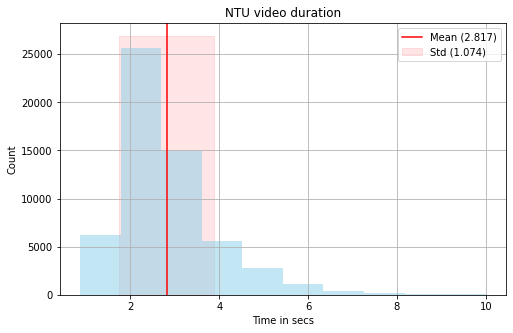

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.hist(durations, color="skyblue", alpha=0.5)
ax.grid()
ax.set_title("NTU video duration")
ax.set_xlabel("Time in secs")
ax.set_ylabel("Count")
ax.axvline(x=np.mean(durations), color="red", label=f"Mean ({np.mean(durations):.3f})")
ax.fill_betweenx(ax.get_ylim(), np.mean(durations) - np.std(durations), np.mean(durations) + np.std(durations), alpha=0.1, color="red", label=f"Std ({np.std(durations):.3f})")
ax.legend()

plt.show()

### Label distribution

In [14]:
len(combined)

56880

In [18]:
combined[1000]

'jump_up/S003C002P016R002A027_rgb.avi '

In [20]:
df = pd.DataFrame(None)
df["file"] = combined
df["class"] = df["file"].apply(lambda x: x.split("/")[0])

In [32]:
sort_df = df.iloc[(-df.groupby('class')["class"].transform('size')).argsort(kind='mergesort')]

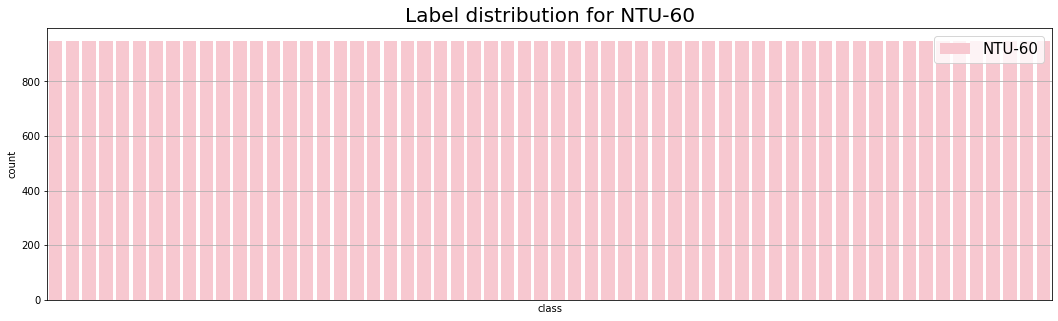

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.grid()
sns.countplot(data=sort_df, x=f"class", ax=ax, label="NTU-60", color="pink")
ax.set_title("Label distribution for NTU-60", fontsize=20)
ax.legend(fontsize=15)
ax.set_xticks([])

plt.show()

In [36]:
df["class"].value_counts()

touch_back__backache_                          948
jump_up                                        948
wear_jacket                                    948
reach_into_pocket                              948
make_a_phone_call_answer_phone                 948
kicking_something                              948
staggering                                     948
use_a_fan__with_hand_or_paper__feeling_warm    948
take_off_jacket                                948
taking_a_selfie                                948
shake_head                                     948
pointing_to_something_with_finger              948
sitting_down                                   948
pickup                                         948
wear_on_glasses                                948
touch_neck__neckache_                          948
nod_head_bow                                   948
take_off_glasses                               948
pushing_other_person                           948
touch_head__headache_          